<a href="https://colab.research.google.com/github/shravanimmy/stock-project-group/blob/main/stock_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# URLs for confirmed cases and deaths
confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

# Read data into dataframes
confirmed_cases_df = pd.read_csv(confirmed_cases_url)
deaths_df = pd.read_csv(deaths_url)

# Drop unnecessary columns (Latitude, Longitude, etc.)
confirmed_cases_df = confirmed_cases_df.drop(columns=['Lat', 'Long', 'Province/State'])
deaths_df = deaths_df.drop(columns=['Lat', 'Long', 'Province/State'])

# Aggregate and sum on a global level
global_confirmed_cases = confirmed_cases_df.sum(axis=0)[3:]  # Starting from the 4th column (dates)
global_deaths = deaths_df.sum(axis=0)[3:]  # Starting from the 4th column (dates)

# Calculate per day data by subtracting each day with the previous day
daily_confirmed = global_confirmed_cases.diff().fillna(global_confirmed_cases.iloc[0])
daily_deaths = global_deaths.diff().fillna(global_deaths.iloc[0])



# Create a new dataframe
global_data = pd.DataFrame({
    'Date': global_confirmed_cases.index,
    'Global_Confirmed_Cases': daily_confirmed.values,
    'Global_Deaths': daily_deaths.values
})

# Display the resulting dataframe
#print(global_data)
global_data


,Date,Global_Confirmed_Cases,Global_Deaths
0,1/24/20,944,26
1,1/25/20,493,16
2,1/26/20,683,14
3,1/27/20,809,26
4,1/28/20,2651,49
...,...,...,...
1136,3/5/23,56126,148
1137,3/6/23,58040,366
1138,3/7/23,130437,923
1139,3/8/23,179446,1445


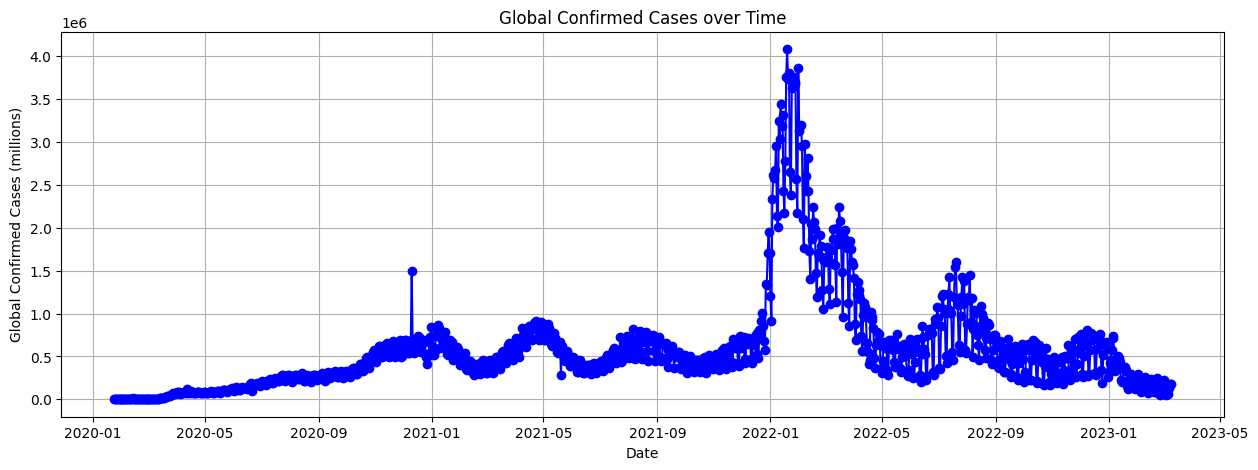

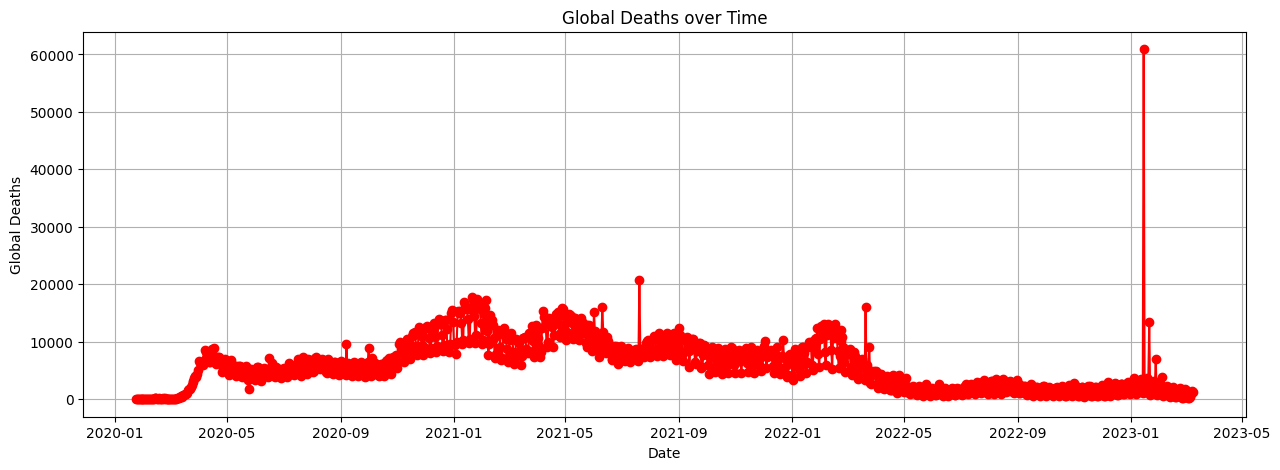

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date' to datetime format
global_data['Date'] = pd.to_datetime(global_data['Date'])

# Plot 1: Global Confirmed Cases over Time
plt.figure(figsize=(15, 5))
plt.plot(global_data['Date'], global_data['Global_Confirmed_Cases'], marker='o', linestyle='-', color='b')
plt.title('Global Confirmed Cases over Time')
plt.xlabel('Date')
plt.ylabel('Global Confirmed Cases (millions)')
plt.grid(True)
plt.show()

# Plot 2: Global Deaths over Time
plt.figure(figsize=(15, 5))
plt.plot(global_data['Date'], global_data['Global_Deaths'], marker='o', linestyle='-', color='r')
plt.title('Global Deaths over Time')
plt.xlabel('Date')
plt.ylabel('Global Deaths')
plt.grid(True)
plt.show()


*Graph 1:* Global Confirmed Cases over Time
X-Axis (Horizontal): Represents the timeline in dates
Y-Axis (Vertical): Represents the number of global confirmed cases.
Blue Line: Connects data points, showing the trend of global confirmed cases over time.
Blue Markers (o): Indicate individual data points on the line.

*Graph 2:* Global Deaths over Time
X-Axis (Horizontal): Represents the timeline in dates
Y-Axis (Vertical): Represents the number of global deaths.
Red Line: Connects data points, showing the trend of global deaths over time.
Red Markers (o): Indicate individual data points on the line.

**General Interpretation:**
By examining the slope and pattern of the lines, one can observe the rate of increase in confirmed cases and deaths over time.The first plot indicates that the highest number of confirmed COVID-19 cases occurred during the period between January and May of 2022 ,during the period confirmed cases hit more than 4 million.While the number of COVID-19 death cases reached 60,903 in January 2023, marking the highest count over the years.


In [3]:
pip install alpha_vantage

**1. Overall American Market >>Tesla Inc. (TSLA)**

Tesla, Inc. is an American multinational automotive and clean energy company headquartered in Austin, Texas, which designs and manufactures electric vehicles, stationary battery energy storage devices from home to grid-scale, solar panels and solar shingles, and related products and services.


In [4]:
from os import close
####For Tesla - American Market
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import time


api_key = '3WKRULWF08V4EE63'
# Create an instance of the TimeSeries class

#american market
ts = TimeSeries(key=api_key, output_format='pandas')
data=ts.get_daily(symbol='TSLA', outputsize='full')

for date in global_data['Date']:
  d=data[0][(data[0].index == date)]
  if(d.empty):
      high_price=0
      low_price =0
      close_price = 0
  else:
        high_price=d['2. high'][0]
        low_price=d['3. low'][0]
        close_price=d['4. close'][0]

  global_data.loc[global_data['Date'] == date, 'TSLA_High'] = high_price
  global_data.loc[global_data['Date'] == date, 'TSLA_Low'] = low_price
  global_data.loc[global_data['Date'] == date, 'TSLA_Close'] = close_price


global_data[['Date', 'TSLA_High', 'TSLA_Low','TSLA_Close']]


,Date,TSLA_High,TSLA_Low,TSLA_Close
0,2020-01-24,573.86,554.2600,564.82
1,2020-01-25,0.00,0.0000,0.00
2,2020-01-26,0.00,0.0000,0.00
3,2020-01-27,564.44,539.2800,558.02
4,2020-01-28,576.81,558.0800,566.90
...,...,...,...,...
1136,2023-03-05,0.00,0.0000,0.00
1137,2023-03-06,198.60,192.3000,193.81
1138,2023-03-07,194.20,186.1000,187.71
1139,2023-03-08,186.50,180.0000,182.00


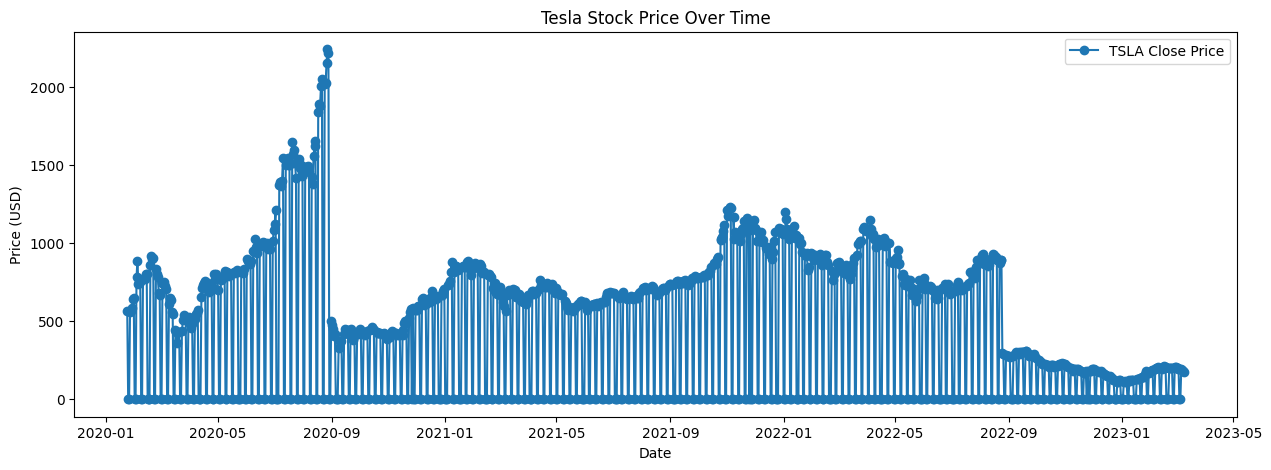

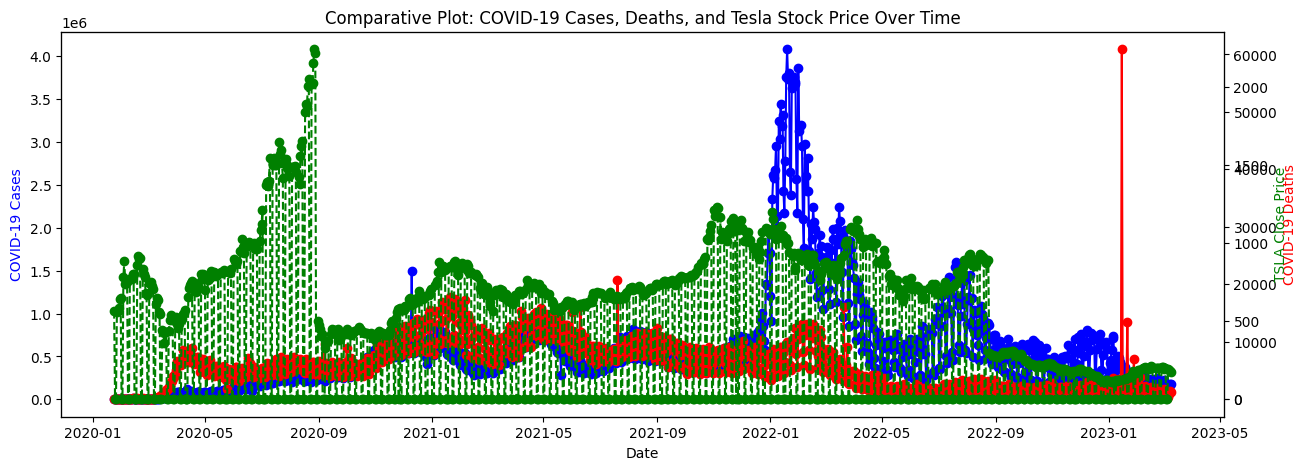

In [ ]:
# Plot 1: Tesla Stock Price Over Time
# Convert 'Date' to datetime format
global_data['Date'] = pd.to_datetime(global_data['Date'])

plt.figure(figsize=(15, 5))
plt.plot(global_data['Date'], global_data['TSLA_Close'], label='TSLA Close Price', marker='o')
plt.title('Tesla Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

#Plot 2 :Comparative Plot: COVID-19 Cases, Deaths, and Tesla Stock Price Over Time
# Create a Comparative Plot
plt.figure(figsize=(15, 5))
# Plot COVID-19 Cases
plt.plot(global_data['Date'], global_data['Global_Confirmed_Cases'], label='Confirmed Cases', marker='o', color='blue')
# Plot COVID-19 Deaths on a secondary y-axis
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(global_data['Date'], global_data['Global_Deaths'], label='Deaths', marker='o', color='red')

# Plot Tesla Stock Price on a secondary y-axis
ax3 = ax1.twinx()
ax3.plot(global_data['Date'], global_data['TSLA_Close'], label='TSLA Close Price', marker='o', linestyle='dashed', color='green')

# Customize the plot
ax1.set_xlabel('Date')
ax1.set_ylabel('COVID-19 Cases', color='blue')
ax2.set_ylabel('COVID-19 Deaths', color='red')
ax3.set_ylabel('TSLA Close Price', color='green')

plt.title('Comparative Plot: COVID-19 Cases, Deaths, and Tesla Stock Price Over Time')
plt.show()

*Plot 1: Tesla Stock Price Over Time*

*Plot 2: Comparative Plot - COVID-19 Cases, Deaths, and Tesla Stock*
The blue line with circular markers represents the trend of global confirmed COVID-19 cases. The red line with circular markers represents the trend of global COVID-19 deaths. Both share the same primary y-axis.The green dashed line with circular markers represents the trend of Tesla stock closing prices. It is plotted on a secondary y-axis to the right.Represents the timeline in dates.

This comparative plot allows visually inspect potential correlations or patterns between COVID-19 data and Tesla stock prices over the given time period. The secondary y-axes help in comparing values with different scales.
During the year 2020, Tesla's stock price reached its highest point at dollar 2238.75. However, as COVID-19 cases and death reports increased, the stock price declined. It made an attempt to recover in 2022, but after September 2022, the price consistently remained below $500.


**2. Canada Market>>Toronto-Dominion Bank**

Toronto-Dominion Bank, doing business as TD Bank Group, is a Canadian multinational banking and financial services corporation headquartered in Toronto, Ontario.

In [5]:
###For TD - Canada Market
# Alpha Vantage API key (replace 'your_api_key' with your actual API key)
# api_key = '44R0OA310NHJ03W8'
# api_key = '4GCMU5950MOXB55I'
# api_key = 'QPNJZSFZ1S2LPWEJ'
# api_key = '45TFGXRKLDVI8I1T'

api_key = '3WKRULWF08V4EE63'
# Create an instance of the TimeSeries class

#american market
ts = TimeSeries(key=api_key, output_format='pandas')
data=ts.get_daily(symbol='TD', outputsize='full')
#x=ts.get_daily()
for date in global_data['Date']:

  d=data[0][(data[0].index == date)]
  if(d.empty):
      high_price=0
      low_price =0
      close_price=0
  else:
        high_price=d['2. high'][0]
        low_price=d['3. low'][0]
        close_price=d['4. close'][0]

  global_data.loc[global_data['Date'] == date, 'TD_High'] = high_price
  global_data.loc[global_data['Date'] == date, 'TD_Low'] = low_price
  global_data.loc[global_data['Date'] == date, 'TD_Close'] = close_price


print(global_data[[ 'TD_High', 'TD_Low','TD_Close']])

      TD_High  TD_Low  TD_Close
0      56.740  56.240     56.46
1       0.000   0.000      0.00
2       0.000   0.000      0.00
3      56.180  55.510     56.08
4      56.400  55.990     56.39
...       ...     ...       ...
1136    0.000   0.000      0.00
1137   65.905  65.140     65.20
1138   64.970  63.070     63.46
1139   63.590  62.835     63.17
1140   63.130  61.615     61.89

[1141 rows x 3 columns]


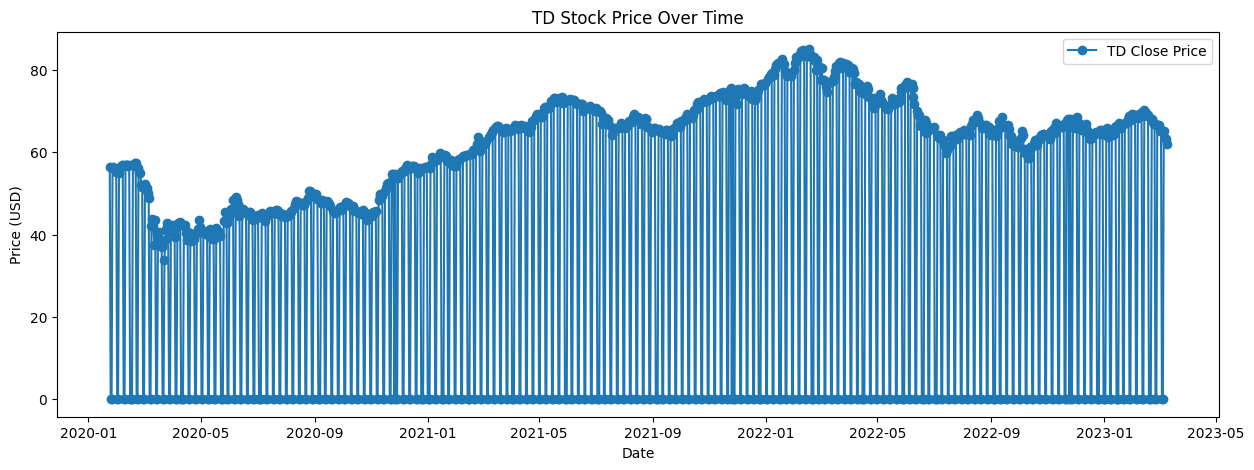

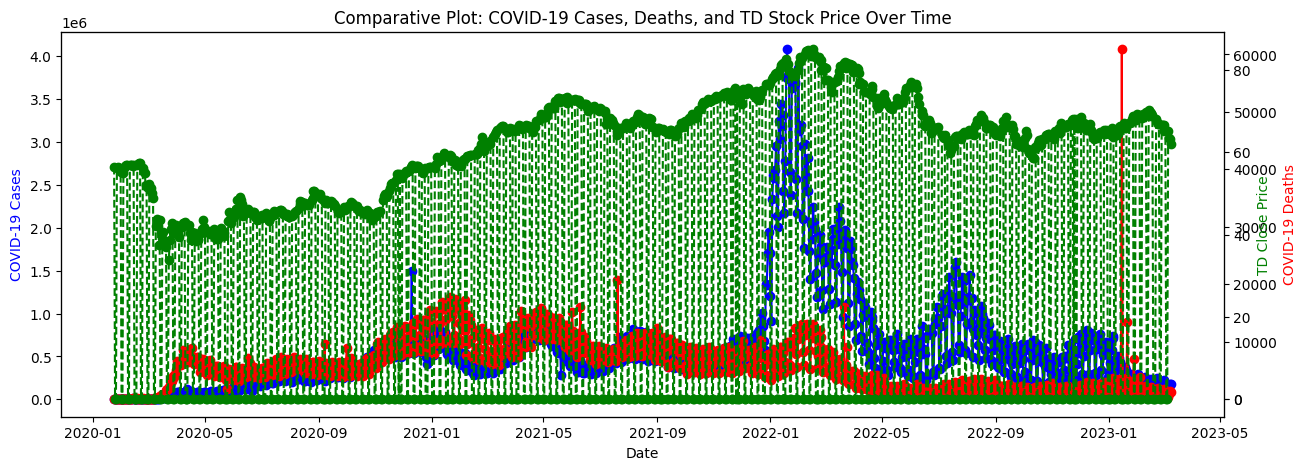

In [6]:
# Plot 1: TD Stock Price Over Time

# Convert 'Date' to datetime format
global_data['Date'] = pd.to_datetime(global_data['Date'])

plt.figure(figsize=(15, 5))
plt.plot(global_data['Date'], global_data['TD_Close'], label='TD Close Price', marker='o')
plt.title('TD Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

#Plot 2 :Comparative Plot: COVID-19 Cases, Deaths, and TD Stock Price Over Time
# Create a Comparative Plot
plt.figure(figsize=(15, 5))
# Plot COVID-19 Cases
plt.plot(global_data['Date'], global_data['Global_Confirmed_Cases'], label='Confirmed Cases', marker='o', color='blue')
# Plot COVID-19 Deaths on a secondary y-axis
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(global_data['Date'], global_data['Global_Deaths'], label='Deaths', marker='o', color='red')

# Plot TD Stock Price on a secondary y-axis
ax3 = ax1.twinx()
ax3.plot(global_data['Date'], global_data['TD_Close'], label='TD Close Price', marker='o', linestyle='dashed', color='green')

# Customize the plot
ax1.set_xlabel('Date')
ax1.set_ylabel('COVID-19 Cases', color='blue')
ax2.set_ylabel('COVID-19 Deaths', color='red')
ax3.set_ylabel('TD Close Price', color='green')

plt.title('Comparative Plot: COVID-19 Cases, Deaths, and TD Stock Price Over Time')
plt.show()

3. Travel sector>>Expedia Group

Expedia Group, Inc. is an American travel technology company that owns and operates travel fare aggregators and travel metasearch engines, including Expedia.com, Hotels.com, Vrbo, Travelocity, Hotwire.com, Orbitz, Ebookers, CheapTickets, CarRentals.com, Expedia Cruises, Wotif, and Trivago.

In [7]:
###For Expedia - Travel sector
# Alpha Vantage API key (replace 'your_api_key' with your actual API key)
# api_key = '44R0OA310NHJ03W8'
# api_key = '4GCMU5950MOXB55I'
# api_key = 'QPNJZSFZ1S2LPWEJ'
# api_key = '45TFGXRKLDVI8I1T'

api_key = '44R0OA310NHJ03W8'
# Create an instance of the TimeSeries class

#american market
ts = TimeSeries(key=api_key, output_format='pandas')
data=ts.get_daily(symbol='ExPE', outputsize='full')
for date in global_data['Date']:

  d=data[0][(data[0].index == date)]
  if(d.empty):
      high_price=0
      low_price =0
      close_price =0
  else:
        high_price=d['2. high'][0]
        low_price=d['3. low'][0]
        close_price=d['4. close'][0]

  global_data.loc[global_data['Date'] == date, 'EXPE_High'] = high_price
  global_data.loc[global_data['Date'] == date, 'EXPE_Low'] = low_price
  global_data.loc[global_data['Date'] == date, 'EXPE_Close'] = close_price


print(global_data[[ 'EXPE_High', 'EXPE_Low', 'EXPE_Close']])

      EXPE_High  EXPE_Low  EXPE_Close
0       114.280   111.731      112.14
1         0.000     0.000        0.00
2         0.000     0.000        0.00
3       109.885   106.890      109.08
4       110.400   109.000      109.11
...         ...       ...         ...
1136      0.000     0.000        0.00
1137    110.090   107.560      108.55
1138    110.640   107.150      107.51
1139    108.630   106.030      107.23
1140    107.270   100.670      100.80

[1141 rows x 3 columns]


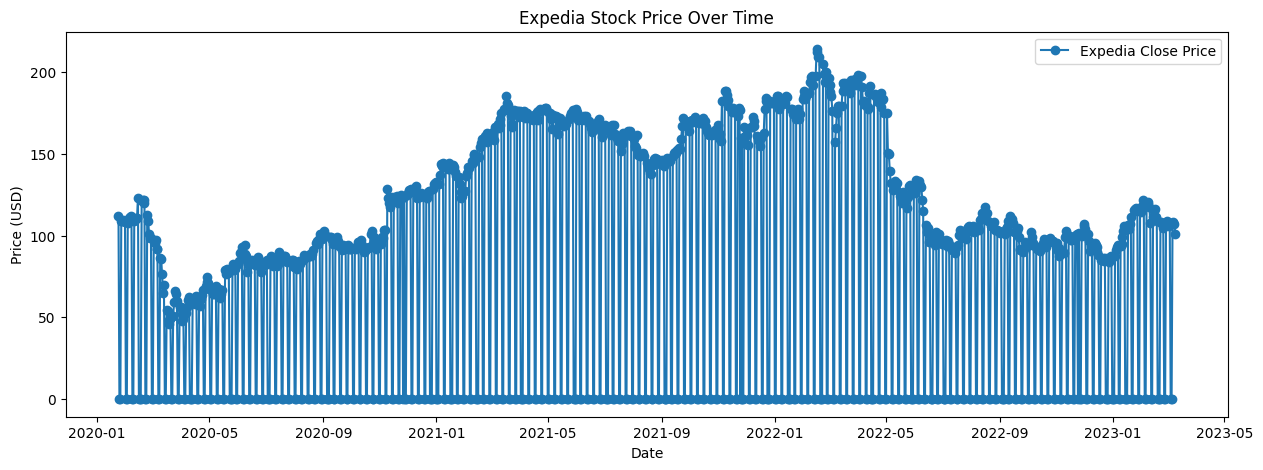

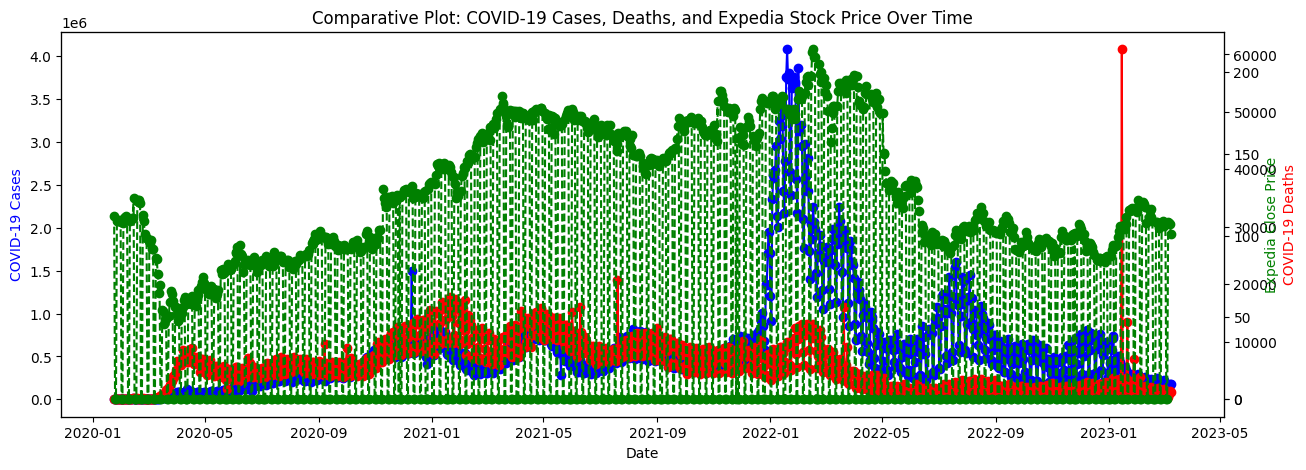

In [8]:
# Plot 1: Expedia Stock Price Over Time

# Convert 'Date' to datetime format
global_data['Date'] = pd.to_datetime(global_data['Date'])

plt.figure(figsize=(15, 5))
plt.plot(global_data['Date'], global_data['EXPE_Close'], label='Expedia Close Price', marker='o')
plt.title('Expedia Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

#Plot 2 :Comparative Plot: COVID-19 Cases, Deaths, and Expedia Stock Price Over Time
# Create a Comparative Plot
plt.figure(figsize=(15, 5))
# Plot COVID-19 Cases
plt.plot(global_data['Date'], global_data['Global_Confirmed_Cases'], label='Confirmed Cases', marker='o', color='blue')
# Plot COVID-19 Deaths on a secondary y-axis
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(global_data['Date'], global_data['Global_Deaths'], label='Deaths', marker='o', color='red')

# Plot Expedia Stock Price on a secondary y-axis
ax3 = ax1.twinx()
ax3.plot(global_data['Date'], global_data['EXPE_Close'], label='Expedia Close Price', marker='o', linestyle='dashed', color='green')

# Customize the plot
ax1.set_xlabel('Date')
ax1.set_ylabel('COVID-19 Cases', color='blue')
ax2.set_ylabel('COVID-19 Deaths', color='red')
ax3.set_ylabel('Expedia Close Price', color='green')

plt.title('Comparative Plot: COVID-19 Cases, Deaths, and Expedia Stock Price Over Time')
plt.show()

**4. The Real Estate sector>>Equity Residential**

Equity Residential is a publicly traded real estate investment trust that invests in apartments. As of December 31, 2022, the company owned or had investments in 308 properties

In [9]:
# Alpha Vantage API key (replace 'your_api_key' with your actual API key)
# api_key = '44R0OA310NHJ03W8'
# api_key = '4GCMU5950MOXB55I'
# api_key = 'QPNJZSFZ1S2LPWEJ'
# api_key = '45TFGXRKLDVI8I1T'

api_key = '3WKRULWF08V4EE63'
# Create an instance of the TimeSeries class

#american market
ts = TimeSeries(key=api_key, output_format='pandas')
data=ts.get_daily(symbol='EQR', outputsize='full')
for date in global_data['Date']:

  d=data[0][(data[0].index == date)]
  if(d.empty):
      high_price=0
      low_price =0
      close_price=0
  else:
        high_price=d['2. high'][0]
        low_price=d['3. low'][0]
        close_price=d['4. close'][0]

  global_data.loc[global_data['Date'] == date, 'EQR_High'] = high_price
  global_data.loc[global_data['Date'] == date, 'EQR_Low'] = low_price
  global_data.loc[global_data['Date'] == date, 'EQR_Close'] = close_price


print(global_data[[ 'EQR_High', 'EQR_Low','EQR_Close']])

      EQR_High  EQR_Low  EQR_Close
0        83.28    82.27      82.76
1         0.00     0.00       0.00
2         0.00     0.00       0.00
3        83.01    82.12      82.34
4        83.07    82.23      82.72
...        ...      ...        ...
1136      0.00     0.00       0.00
1137     63.38    62.48      62.70
1138     62.80    60.98      61.16
1139     62.45    60.93      61.94
1140     62.31    60.64      60.86

[1141 rows x 3 columns]


In [10]:
# Alpha Vantage API key (replace 'your_api_key' with your actual API key)
# api_key = '44R0OA310NHJ03W8'
# api_key = '4GCMU5950MOXB55I'
# api_key = 'QPNJZSFZ1S2LPWEJ'
# api_key = '45TFGXRKLDVI8I1T'

api_key = '3WKRULWF08V4EE63'
# Create an instance of the TimeSeries class

#american market
ts = TimeSeries(key=api_key, output_format='pandas')
data=ts.get_daily(symbol='EQR', outputsize='full')
for date in global_data['Date']:

  d=data[0][(data[0].index == date)]
  if(d.empty):
      high_price=0
      low_price =0
      close_price=0
  else:
        high_price=d['2. high'][0]
        low_price=d['3. low'][0]
        close_price=d['4. close'][0]

  global_data.loc[global_data['Date'] == date, 'EQR_High'] = high_price
  global_data.loc[global_data['Date'] == date, 'EQR_Low'] = low_price
  global_data.loc[global_data['Date'] == date, 'EQR_Close'] = close_price


print(global_data[[ 'EQR_High', 'EQR_Low','EQR_Close']])

      EQR_High  EQR_Low  EQR_Close
0        83.28    82.27      82.76
1         0.00     0.00       0.00
2         0.00     0.00       0.00
3        83.01    82.12      82.34
4        83.07    82.23      82.72
...        ...      ...        ...
1136      0.00     0.00       0.00
1137     63.38    62.48      62.70
1138     62.80    60.98      61.16
1139     62.45    60.93      61.94
1140     62.31    60.64      60.86

[1141 rows x 3 columns]
